![alt text](iSalud_Covecare.png 'Logo')

Fuente: 
- https://www.kaggle.com/scratchpad/notebook4031fa4176/edit
- https://www.kaggle.com/srikarkashyap/analyzing-healthcare-data-tutorial

# Analizando datos de programas de salud (EDA)

## Introducción

NTR Vaidya Seva (o Arogya Seva) es el programa de salud insignia del gobierno de Anhra Pradesh (India), con el cual las personas de bajos ingresos de ese estado pueden obtener salud pública de forma gratuita para muchas enfermedades y dolencias importantes

## A meter código!

Comenzamos importando las librerias necesarias:
* *Pandas* para cargar datos y explorar los datos
* *Matplotlib, Seaborn* para su visualización.

In [16]:
# Importamos las librerias 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Vamos a leer el archivo de datos usando la función *read_csv* de Pandas. *read_csv* puede leer de manera sencilla archivos de valores separados por comas (csv).

No existen restricciones para nombrar las variables. *df*, *data* son los términos genéricos más comunes. Arrancamos con *data*.

In [17]:
# Leemos el dataframe
data = pd.read_csv('data/ntrarogyaseva.csv')

Explotamos los datos con la función *head()* que por defecto, muestra los primeros 5 datos.

In [18]:
data.sample(10)

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
266884,266885,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-35,Vijayawada,...,12500,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,08/04/2017 00:00:00,01/05/2017 00:00:00,NO,NaN,D
192915,192916,66,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,BOMMIREDDYPALLI,Kanigiri,...,12500,ANEESH KIDNEY CENTRE,C,ONGOLE,Prakasam,09/02/2017 00:00:00,20/03/2017 00:00:00,NO,NaN,D
402126,402127,51,Female,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Chettupalle,Narsipatnam,...,30000,Sai Spoorthy Hospital,C,VISAKHAPATNAM,Vishakhapatnam,01/08/2017 00:00:00,04/08/2017 00:00:00,NO,NaN,D
388072,388073,66,Female,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Dubhagunta,Pamur,...,30600,Nalluri Nursing Home,C,Ongole,Prakasam,19/07/2017 00:00:00,22/07/2017 00:00:00,NO,NaN,D
254174,254175,55,Male,BC,S15,POLY TRAUMA,S15.3.1.2,Intesive care management for Chest injuries in...,Mallela,P.T.M,...,20000,Sri Venkateswara Institute Of Medical Sciences,G,TIRUPATHI,Chittoor,04/04/2017 00:00:00,04/04/2017 00:00:00,NO,NaN,D
412355,412356,41,Male,BC,S2,ENT SURGERY,S2.1.4,Myringoplasty,Ward-17,Visakhapatnam,...,15080,Sagara Durga Hospital,C,VISAKHAPATNAM,Vishakhapatnam,10/08/2017 00:00:00,11/08/2017 00:00:00,NO,NaN,D
149286,149287,18,Female,OC,S5,ORTHOPEDIC SURGERY AND PROCEDURES,S5.4.6,Soft Tissue Reconstruction Procedures For Join...,Peravali,Vemuru,...,15000,HEALTH HOSPITALSL.G Medical specialities,C,TENALI,Guntur,26/12/2016 00:00:00,29/12/2016 00:00:00,NO,NaN,D
447720,447721,57,Female,Minorities,S12,MEDICAL ONCOLOGY,S12.1.3,Chemotherapy for Breast Cancer with Ac (Ac The...,Ward-50,Guntur(C),...,3600,"Government General Hospital, Guntur",G,GUNTUR,Guntur,16/09/2017 00:00:00,16/09/2017 00:00:00,NO,NaN,D
87826,87827,82,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Razole Rural,Razole,...,30000,KIMS (Krishna Institute of Medical Sciences Lt...,C,RAJAHMUNDRY,East Godavari,01/11/2016 00:00:00,04/11/2016 00:00:00,NO,NaN,D
117557,117558,60,Male,BC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Mogalthur,Mogalthuru,...,30000,Madhu Chalapathi Urological Hospita,C,BHIMAVARAM,West Godavari,02/12/2016 00:00:00,07/12/2016 00:00:00,NO,NaN,D


Ahora vamos a mostrar algunas estadisticas simples de las columnas numéricas del dataset. Utilizamos la función *describe* de los datos para obtenerlas..

In [19]:
# Estadísticas descriptivas
# data.describe(include='all') # Incluye todas las variables
data.describe(include='all')

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
count,479688.000000,479688.000000,479688,479688,479688,479688,479688,479688,479688,479688,...,479688.000000,479688,479688,479688,479688,479688,475128,479688,10122,479688
unique,NaN,NaN,6,6,29,29,925,923,11801,711,...,NaN,467,2,61,20,937,918,2,740,4
top,NaN,NaN,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-1,Visakhapatnam,...,NaN,Sri Venkateswara Institute Of Medical Sciences,C,VISAKHAPATNAM,Guntur,13/02/2017 00:00:00,29/05/2017 00:00:00,NO,04/01/2017 00:00:00,D
freq,NaN,NaN,260718,246164,74947,74947,65378,65378,3277,9264,...,NaN,21854,369346,50715,60988,1602,1764,469566,40,437948
mean,239844.500000,44.912264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27652.205861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,138474.142301,18.961084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25951.706037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,119922.750000,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,239844.500000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,359766.250000,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora analizamos los nombres de las columnas

In [20]:
# Muestra los nombres de las columnas en el dataset _data_
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

### Tamaño del dataframe

In [22]:
data['HOSP_DISTRICT'].value_counts()

Guntur            60988
Vishakhapatnam    59334
East Godavari     58065
Chittoor          49172
Krishna           45174
Nellore           42405
Kurnool           33024
Hyderabad         27915
West Godavari     23769
Anantapur         18444
Prakasam          16756
Srikakulam        16137
Vizianagaram      13563
YSR Kadapa        13329
Ranga Reddy        1244
Khammam             346
Karimnagar           11
Mahabubnagar          6
Warangal              3
Nizamabad             3
Name: HOSP_DISTRICT, dtype: int64

In [23]:
data.shape

(479688, 24)

### Creación de variables
Es muy útil trabajar con las variables existentes para generar nueva información.

In [24]:
data['CATEGORY'] = data['CATEGORY_CODE'] + ' - ' + data['CATEGORY_NAME']
data['CATEGORY'].reset_index()

,index,CATEGORY
0,0,M6 - NEPHROLOGY
1,1,M6 - NEPHROLOGY
2,2,M6 - NEPHROLOGY
3,3,M6 - NEPHROLOGY
4,4,M6 - NEPHROLOGY
...,...,...
479683,479683,S4 - GYNAECOLOGY AND OBSTETRICS SURGERY
479684,479684,S12 - MEDICAL ONCOLOGY
479685,479685,S15 - POLY TRAUMA
479686,479686,S3 - OPHTHALMOLOGY SURGERY


In [25]:
data['DIFF'] = data['CLAIM_AMOUNT'] - data['PREAUTH_AMT']

In [26]:
data['DIFF'].reset_index()

,index,DIFF
0,0,-1500
1,1,-1500
2,2,-1000
3,3,-1500
4,4,-1500
...,...,...
479683,479683,0
479684,479684,0
479685,479685,0
479686,479686,0


### Corrección de formatos 

Las columnas PREAUTH_DATE, CLAIM_DATE, SURGERY_DATE, DISCHARGE_DATE y MORTALITY_DATE son cargadas como si fueran del tipo Object, cuando en realidad deberían ser levantadas como fechas

In [27]:
# data = pd.read_csv("input/ntrarogyaseva.csv")
from datetime import datetime

In [28]:
# Convertimos el campo DISCHARGE_DATE a fecha. Tira un error
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 116-04-30 00:00:00

In [ ]:
# Buscamos el error:
# Alternativa I:
data.loc[data['DISCHARGE_DATE'].str.contains('116', na=False)]

In [ ]:
# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00']

In [ ]:
# Reemplazamos los datos erroneos:
# Alternativa I
mappings = {'30/04/0116 00:00:00':'30/04/2016 00:00:00'}
data['DISCHARGE_DATE'] = data['DISCHARGE_DATE'].replace(mappings)

# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00', 'DISCHARGE_DATE'] = '30/04/2016 00:00:00'

In [ ]:
# Convertimos el campo DISCHARGE_DATE a fecha nuevamente
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

In [ ]:
data['PREAUTH_DATE'] = pd.to_datetime(data['PREAUTH_DATE'])
data['CLAIM_DATE'] = pd.to_datetime(data['CLAIM_DATE'])
data['MORTALITY_DATE'] = pd.to_datetime(data['MORTALITY_DATE'])
data['SURGERY_DATE'] = pd.to_datetime(data['SURGERY_DATE'])

In [ ]:
# Borramos la columna que tiene el índice del CSV 
data = data.drop('   ', axis = 1)

In [ ]:
data.to_csv('data/ntrarogyaseva_cut.csv', index = False)

### NAN Values 

In [ ]:
data.isnull().sum()

In [ ]:
# DISCHARGE_DATE tiene NAs porque pueden referirse a los pacientes que siguen internados o no tienen el alta
data.loc[data['DISCHARGE_DATE'].isna()]

In [ ]:
# Podemos chequear si hay pacientes con DISCHARGE_DATE NA y que hallan fallecido
data.loc[(data['Mortality Y / N']=='YES') & (data['DISCHARGE_DATE'].isna())]

In [ ]:
# Los MORTALITY_DATE en blanco, es porque no falleció o por error en la base
data.loc[(data['Mortality Y / N']=='NO') & (data['MORTALITY_DATE'].isna())]

## Analizando un poco mas profundo...

### Cual es la distribución de la variable SEX?

*value_counts()* es una función de Pandas que puede ser usada para obtener la distribución de los datos, en la columna que se especifique.

In [ ]:
# Cantidad de cada valor en la columna SEX
data['SEX'].value_counts()

*CUIDADO*: Existe valores que están ingresados de forma diferente, que refieren al mismo valor. *Male* and *MALE* no representan valores diferentes! 

Es posible hacer un *replace* de los valores mal ingresados para normalizar la variable.
(Ademas de reemplazar Male (Child) -> Boy and Female (Child) -> Girl por conveniencia)

In [ ]:
# Mapeamos para normalizar
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}

In [ ]:
# Reemplazamos los valores utilizando el mapping arriba definido
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

La visualización de esta información se puede hacer de manera sencilla utilizando la función gráfica que incluye Pandas.

In [ ]:
# Value count de Sex de forma gráfica
data['SEX'].value_counts().plot.bar()

### Cual es la distribución de la variable AGE?

Media, mediana y moda:

In [ ]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Top 10 de las edades mas repetidas.

In [ ]:
# top 10 age
data['AGE'].value_counts().head(10)

In [ ]:
# boxplot para AGE
data['AGE'].plot.box()

En el grafico de arriba, la caja representa el **[Rango Intercuatilico (IQR, en inglés)](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico)** de los datos. 


El IQR representa la región donde cae el 50% de los datos. Por ejemplo del 25% al 75% del dataframe.
Todo dato que cae fuera de 1.5 veces el IQR es considerado, en general, una anomalía (OJO, NO SIEMPRE, DEPENDE DEL CONOCIMIENTO DE LOS DATOS POR PARTE DEL ANALISTA)

Los círculos se considerarían _outliers_

La librería _Seaborn_ ofrece visualizaciones mejores, de forma sencilla.


In [ ]:
# sns.boxplot(data['AGE']) # Devuelve un warning, que se solucina definiendo x e y.
sns.boxplot(x=data['AGE']); # El ; evita la impresión de texto previo al gráfico.

### Preguntando y respondiendo con los datos

Una vez que hayamos realizado una pequeña exploración en los datos, ahora avancemos a realizarnos algunas preguntas para entender mejor el dataframe.

**Qué debería hacer si sólo quiero analizar los registros que pertenecen al distrito de Krishna?**

Deberí selecciononar un subconjunto de datos pertenencientes a Krishna. Pandas lo hace en dos sencillos pasos:

    1. Condición que se debe satisfacer: data['DISTRICT_NAME']=='Krishna'
    2. Insertamos la condición en el dataframe: [data['DISTRICT_NAME']=='Krishna']
      

In [29]:
# subset de datos que pertenecen al distrito de Krishna
data[data['DISTRICT_NAME']=='Krishna'].head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
30,31,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,...,G,HYDERABAD,Hyderabad,06/08/2014 00:00:00,01/09/2014 00:00:00,NO,NaN,D,S12 - MEDICAL ONCOLOGY,0
56,57,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,...,C,HYDERABAD,Ranga Reddy,28/10/2014 00:00:00,06/11/2014 00:00:00,NO,NaN,D,M5 - CARDIOLOGY,-5000
58,59,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,...,C,GUNTUR,Guntur,04/11/2014 00:00:00,12/11/2014 00:00:00,NO,NaN,D,S7 - CARDIAC AND CARDIOTHORACIC SURGERY,-10000
97,98,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,...,C,VIJAYAWADA,Krishna,08/04/2015 00:00:00,NaN,YES,03/05/2015 00:00:00,P,M6 - NEPHROLOGY,-2500
111,112,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,...,G,KADAPA,YSR Kadapa,28/05/2015 00:00:00,01/06/2015 00:00:00,NO,NaN,D,M7 - NEUROLOGY,-10000


**Enfermedad/intervención con mayor prevalencia, por distrito**

Se puede obtener iterando a través de todos los distritos, y seleccionando el subset de datos para cada uno de ellos.


In [30]:
# Iteración
for i in data['DISTRICT_NAME'].unique():
    print("Distrito: {}\nEnfermedad/intervención y Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

Distrito: Srikakulam
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64
Distrito: Kurnool
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64
Distrito: Vizianagaram
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64
Distrito: Guntur
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64
Distrito: Vishakhapatnam
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64
Distrito: West Godavari
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64
Distrito: Krishna
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64
Distrito: East Godavari
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    6998
Name: SURG

**Promedio de claim amount, por distrito**

In [31]:
# Average claim amount for surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("Distrito: {}\nMedia Claim Amount: ₹{}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

Distrito: Srikakulam
Media Claim Amount: ₹25593.712618634367
Distrito: Kurnool
Media Claim Amount: ₹28598.91853309593
Distrito: Vizianagaram
Media Claim Amount: ₹25097.78006899492
Distrito: Guntur
Media Claim Amount: ₹31048.73950729927
Distrito: Vishakhapatnam
Media Claim Amount: ₹25977.94638304871
Distrito: West Godavari
Media Claim Amount: ₹27936.70608610806
Distrito: Krishna
Media Claim Amount: ₹31015.383233247547
Distrito: East Godavari
Media Claim Amount: ₹26166.136719737173
Distrito: Prakasam
Media Claim Amount: ₹28655.81036215859
Distrito: Nellore
Media Claim Amount: ₹26105.122376744654
Distrito: YSR Kadapa
Media Claim Amount: ₹27945.216899192998
Distrito: Chittoor
Media Claim Amount: ₹25708.102690948628
Distrito: Anantapur
Media Claim Amount: ₹27664.166978581827


El desvio estandar no parece ser demasiado alto. El distrito de Guntur es el de valor mas alto con ₹31048 mientras  Vizianagaram ocupa el último lugar con ₹25097

**Estadísticas por categoria de operación**

Vamos a utilizar el _groupby_ de Pandas para construir estadísticas, agrupando los datos por la categoría de operación. El _groupby_ trabaja de forma similar al comando de _SQL_ del mismo nombre

In [32]:
# group by surgery para obtener estadísticas
data.groupby(['CATEGORY_NAME']).mean()
#data.groupby(['CATEGORY_NAME','HOSP_DISTRICT']).mean()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DIFF
CATEGORY_NAME,,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,220433.263365,51.764553,87052.165471,82487.123074,-4565.042397
CARDIOLOGY,222494.427828,54.652048,33215.140211,26731.893660,-6483.246551
COCHLEAR IMPLANT SURGERY,64429.337838,1.581081,520000.000000,516486.486486,-3513.513514
CRITICAL CARE,225189.278328,51.014649,69927.226196,50185.150797,-19742.075399
DERMATOLOGY,145752.231707,46.573171,28003.012195,21728.353659,-6274.658537
ENDOCRINOLOGY,173188.782353,45.066667,18981.376471,14875.437255,-4105.939216
ENT SURGERY,248911.441121,32.521940,15691.907198,14938.095612,-753.811586
GASTROENTEROLOGY,169310.423028,41.662383,37085.464601,23798.118922,-13287.345679
GENERAL MEDICINE,116546.798682,35.330161,30347.573939,21840.991215,-8506.582723


Cochlear Implant Surgery es el que tiene la operación mas costosa. (₹520000 en promedio). Las Protesis (Prostheses) cuestan ₹1200 (las mas baratas). A su vez, el grupo mas joven también para ser el que demanada la Cochlear Implant Surgery: 1.58 años, mientras que Neurology  tiene pacientes de, en promedio, ~56.

In [33]:
#data.groupby(['HOSP_DISTRICT','CATEGORY_NAME'])['AGE'].mean().reset_index()
data.groupby(['CATEGORY_NAME']).agg({
    'AGE':'mean',
#     'DISCHARGE_DATE':'min',
    'Mortality Y / N':'count'
})

,AGE,Mortality Y / N
CATEGORY_NAME,,
CARDIAC AND CARDIOTHORACIC SURGERY,51.764553,44201
CARDIOLOGY,54.652048,18629
COCHLEAR IMPLANT SURGERY,1.581081,74
CRITICAL CARE,51.014649,2321
DERMATOLOGY,46.573171,82
ENDOCRINOLOGY,45.066667,510
ENT SURGERY,32.521940,12101
GASTROENTEROLOGY,41.662383,3969
GENERAL MEDICINE,35.330161,1366


In [34]:
data.groupby(['CATEGORY_NAME']).agg(
    **{
        'Edad Mínima': ('AGE', 'min'),
        'Edad Maxima': ('AGE', 'max'),
    })

,Edad Mínima,Edad Maxima
CATEGORY_NAME,,
CARDIAC AND CARDIOTHORACIC SURGERY,0,90
CARDIOLOGY,5,93
COCHLEAR IMPLANT SURGERY,0,11
CRITICAL CARE,10,90
DERMATOLOGY,5,86
ENDOCRINOLOGY,6,96
ENT SURGERY,2,86
GASTROENTEROLOGY,2,88
GENERAL MEDICINE,2,89


**Operación mas común por grupo de edad**

Para encontrar la operación mas común por grupo de edad, vamos a redondear las edades al valor múltiplo de 10 mas cercano.

Hacemos una copia del dataframe para no _ensuciar_ el dataframe original.

In [35]:
dataround = data.copy()

Utilizamos la función _round_ de Pandas para redonder el valor de la edad. *-1* indica que redondeamos hasta1 dígito a la izquierda del valor decimal.

In [36]:
# round a la edad en 0 o 1
dataround['AGE'] = dataround['AGE'].round(-1)

Visualizamos los grupos de edad utilizando la función _Seaborn countplot_ 

<AxesSubplot:xlabel='AGE', ylabel='count'>

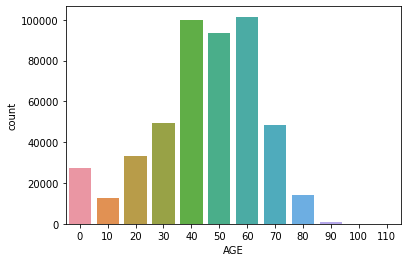

In [37]:
# frequency plot
sns.countplot(x=dataround['AGE'])

**Operaciones mas comunes por grupo de edad**

In [38]:
res = dataround.groupby(['AGE', 'CATEGORY_NAME'], as_index=False)['SEX'].count()\
        .sort_values('SEX', ascending=False)\
        .drop_duplicates('AGE')\
        .sort_values('AGE')
        
res

,AGE,CATEGORY_NAME,SEX
16,0,PEDIATRICS,19395
44,10,POLY TRAUMA,3564
70,20,POLY TRAUMA,7631
97,30,POLY TRAUMA,8382
116,40,NEPHROLOGY,18972
143,50,NEPHROLOGY,19411
168,60,NEPHROLOGY,18050
199,70,POLY TRAUMA,9217
222,80,POLY TRAUMA,4762
243,90,POLY TRAUMA,445


#### Unir dataframes

Vamos a descargar la tabla de distritos del estado de Andhra Pradesh (https://en.wikipedia.org/wiki/List_of_districts_of_Andhra_Pradesh) con algunas variables adicionales, para pegarle datos del dataframe original a nivel distrito.

In [39]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Andhra_Pradesh'
df_wiki = pd.read_html(wiki_url, header=0)[1]
df_wiki

,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km)
0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34
1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89
2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42
3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79
4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87
5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38
6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07
7,EG,East Godavari,Rajahmundry,2,20,1832332,2561,715.48
8,KN,Dr. B.R. Ambedkar Konaseema,Amalapuram,3,22,1719093,2083,825.30
9,EL,Eluru,Eluru,3,28,2071700,6679,310.18


Vamos a agregar ua columna en la tabla extraída de wikipedia con la cantidad de personas de cada Distrito, que aparece en la base del programa de salud.

Para poder hacerlo, vamos a crear un nuevo dataframe que es el resultado de agrupar en la base del programa la cantidad de registros por distrito.

In [40]:
df_new = data.groupby(['HOSP_DISTRICT'])['AGE'].count().reset_index()
df_new

,HOSP_DISTRICT,AGE
0,Anantapur,18444
1,Chittoor,49172
2,East Godavari,58065
3,Guntur,60988
4,Hyderabad,27915
5,Karimnagar,11
6,Khammam,346
7,Krishna,45174
8,Kurnool,33024
9,Mahabubnagar,6


Vamos a cambiar el nombre de la columna AGE:

In [41]:
df_new.rename(columns = {'AGE': 'Cantidad de Personas en el program'}, 
                inplace = True)

In [42]:
df_merged = pd.merge(df_wiki,
                    df_new,
                    left_on = 'Official name',
                    right_on = 'HOSP_DISTRICT',
                    how = 'left')

In [43]:
df_merged.reset_index()

,index,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),HOSP_DISTRICT,Cantidad de Personas en el program
0,0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,Srikakulam,16137.0
1,1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN,NaN
2,2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,Vizianagaram,13563.0
3,3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN,NaN
4,4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN,NaN
5,5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN,NaN
6,6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN,NaN
7,7,EG,East Godavari,Rajahmundry,2,20,1832332,2561,715.48,East Godavari,58065.0
8,8,KN,Dr. B.R. Ambedkar Konaseema,Amalapuram,3,22,1719093,2083,825.30,NaN,NaN
9,9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN,NaN


Borramos la columna HOSP_DISTRICT

In [44]:
df_merged = df_merged[['Code[10]', 'Official name', 'Headquarters', 'Revenuedivisions',
       'Mandals', 'Population', 'Area(in sq.km)', 'Density(per sq.km)', 'Cantidad de Personas en el program']]

In [45]:
df_merged

,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el program
0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,16137.0
1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN
2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,13563.0
3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN
4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN
5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN
6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN
7,EG,East Godavari,Rajahmundry,2,20,1832332,2561,715.48,58065.0
8,KN,Dr. B.R. Ambedkar Konaseema,Amalapuram,3,22,1719093,2083,825.30,NaN
9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN



Reemplazar varios valores en una columna

Sumar columnas y generar nuevas

### Anomalías
Fuente: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [46]:
# Leemos el dataset
# data = pd.read_csv('data/ntrarogyaseva_cut.csv')

<AxesSubplot:xlabel='AGE', ylabel='CLAIM_AMOUNT'>

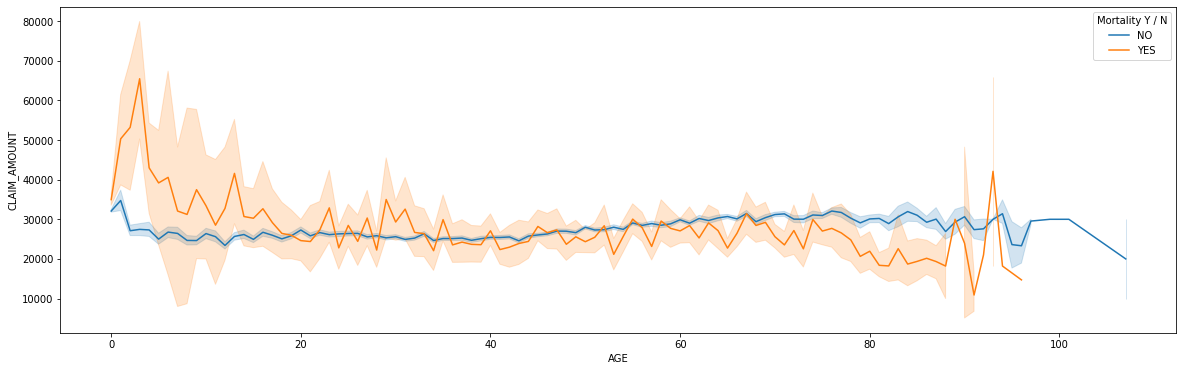

In [47]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x="AGE", y="CLAIM_AMOUNT", ci=95, hue="Mortality Y / N")
# sns.scatterplot(x='AGE', 
#              y='CLAIM_AMOUNT', 
#              data=data, 
#              color='g')

In [48]:
data

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CATEGORY,DIFF
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D,M6 - NEPHROLOGY,-1500
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D,M6 - NEPHROLOGY,-1500
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D,M6 - NEPHROLOGY,-1000
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D,M6 - NEPHROLOGY,-1500
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D,M6 - NEPHROLOGY,-1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479683,479684,22,Female,BC,S4,GYNAECOLOGY AND OBSTETRICS SURGERY,S4.2.2,Laparoscopic Cystectomy,Kalayakagollu,Butchireddipalem,...,C,NELLORE,Nellore,15/11/2017 00:00:00,19/11/2017 00:00:00,NO,NaN,D,S4 - GYNAECOLOGY AND OBSTETRICS SURGERY,0
479684,479685,60,Male,BC,S12,MEDICAL ONCOLOGY,S12.16.2.2,Chemotherapy for Non Hodgkin Lymphoma with R ...,Rajupalem,Kothapatnam,...,C,GUNTUR,Guntur,17/11/2017 00:00:00,18/11/2017 00:00:00,NO,NaN,D,S12 - MEDICAL ONCOLOGY,0
479685,479686,38,Male,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Yeturu,Chejerla,...,C,NELLORE,Nellore,16/11/2017 00:00:00,18/11/2017 00:00:00,NO,NaN,D,S15 - POLY TRAUMA,0
479686,479687,59,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Ganapavaram,Ganapavaram,...,C,GUNTUR,Guntur,16/11/2017 00:00:00,18/11/2017 00:00:00,NO,NaN,D,S3 - OPHTHALMOLOGY SURGERY,0


In [49]:
# Reducimos el DF para trabajar con mayor velocidad
# d1 = pd.to_datetime('2016-06-01')
# data_graph = data.loc[data['PREAUTH_DATE']<d1]

data_graph = data.loc[data['SURGERY_DATE']>'28/12/2016 00:00:00']

#data_graph = data_graph.copy()
data_graph.shape

(36873, 26)

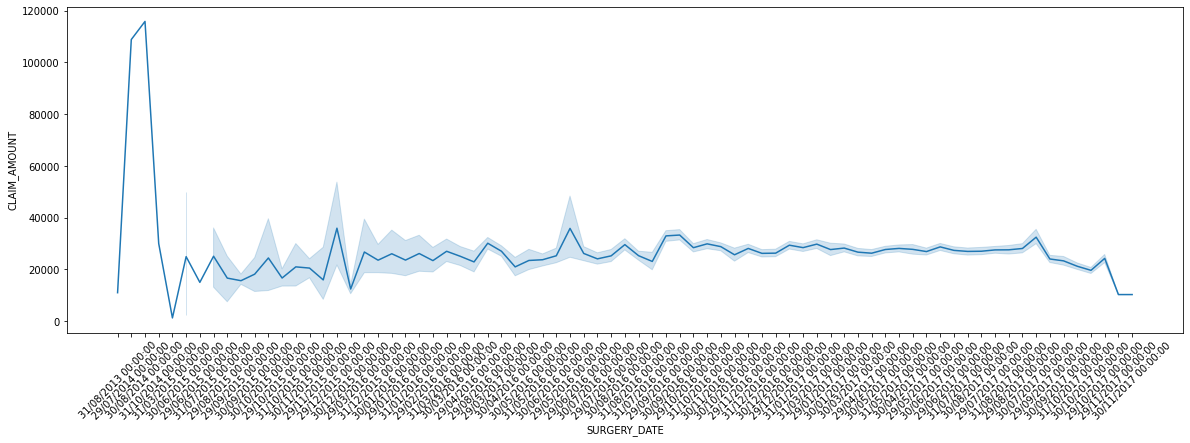

In [50]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=data_graph, x="SURGERY_DATE", y="CLAIM_AMOUNT")
plt.xticks(rotation=45); # el ; oculta el texto previo al gráfico. El mismo resultado se logra con plt.show()

In [51]:
data_graph.sort_values(by='SURGERY_DATE', ascending=False)
data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

#data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'] - 3*data_graph['CLAIM_AMOUNT']
#data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'] + 3*data_graph['CLAIM_AMOUNT']
# data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

/tmp/ipykernel_871541/304419442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
/tmp/ipykernel_871541/304419442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
/tmp/ipykernel_871541/304419442.py:4: SettingWithCopyWarning: 
A value is trying to be set o

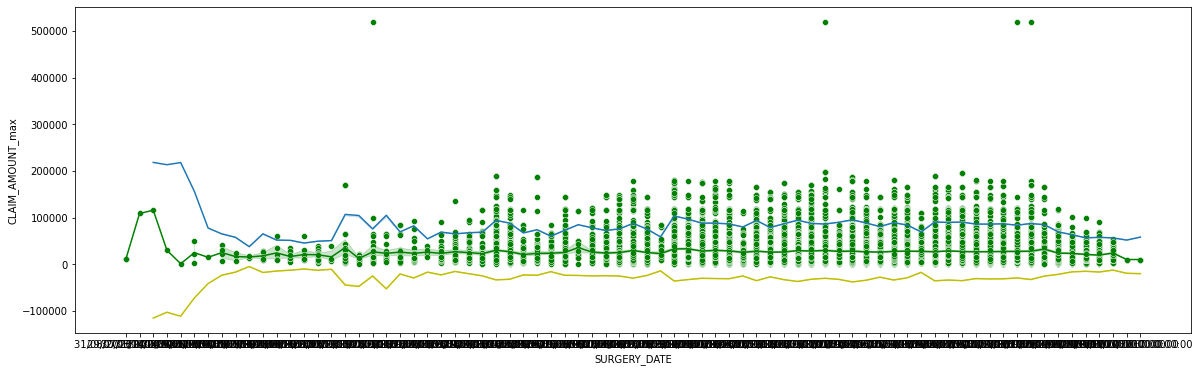

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

# ax.axes.set_title("Date and Claim Amount",fontsize=20)
# ax.set_xlabel("Date",fontsize=15)
# ax.set_ylabel("Claim Amount",fontsize=15)
# ax.tick_params(labelsize=5)
# plt.xticks(rotation=45)

plt.show()

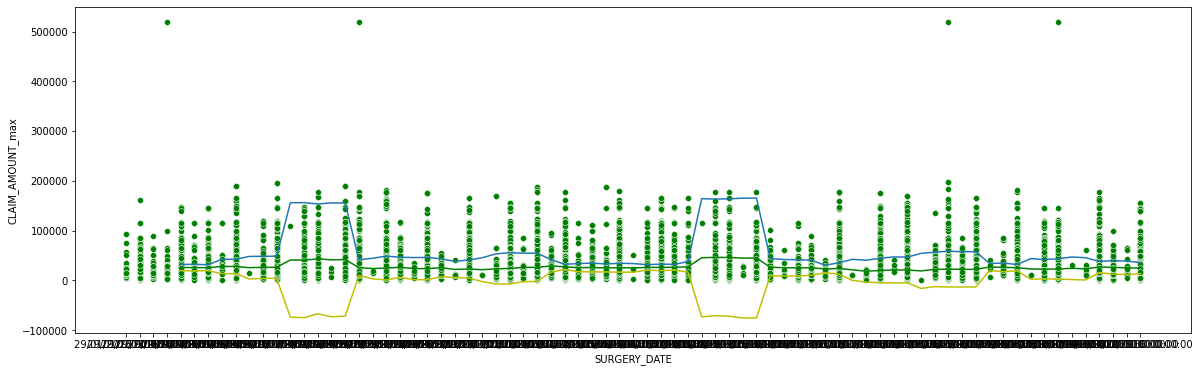

In [53]:
# Agrupamos los datos por fecha, con el promedio del CLAIM_AMOUNT
graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

# Calculamos el la media movil para el CLAIM_AMOUNT y -+ 3 desvíos
graph.sort_values(by='SURGERY_DATE', ascending=False)
graph['CLAIM_AMOUNT_min'] = graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_max'] = graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_RM'] = graph['CLAIM_AMOUNT'].rolling(5).mean()

fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

#### Eliminar outliers

- Computamos el Z-score para la columna seleccionada, relativo a la media y al STD de esa columna
- Tomamos el valor absoluto del Z-score.

Si queremos calcular para todas las variables
- df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  
_all(axis=1)_  garantiza qeu para cada fila, todas las columnas satisfacen la restricciónensures that for each row, all column satisfy the constraint.


In [54]:
from scipy import stats
import numpy as np
# graph_graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

data_graph = data_graph[(np.abs(stats.zscore(data_graph['CLAIM_AMOUNT'])) < 3)]

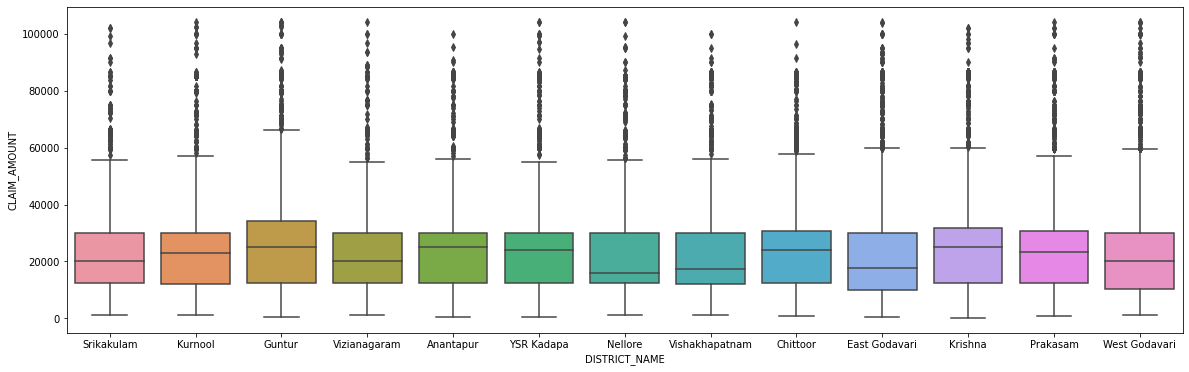

In [55]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(x=data_graph['DISTRICT_NAME'], y=data_graph['CLAIM_AMOUNT']);

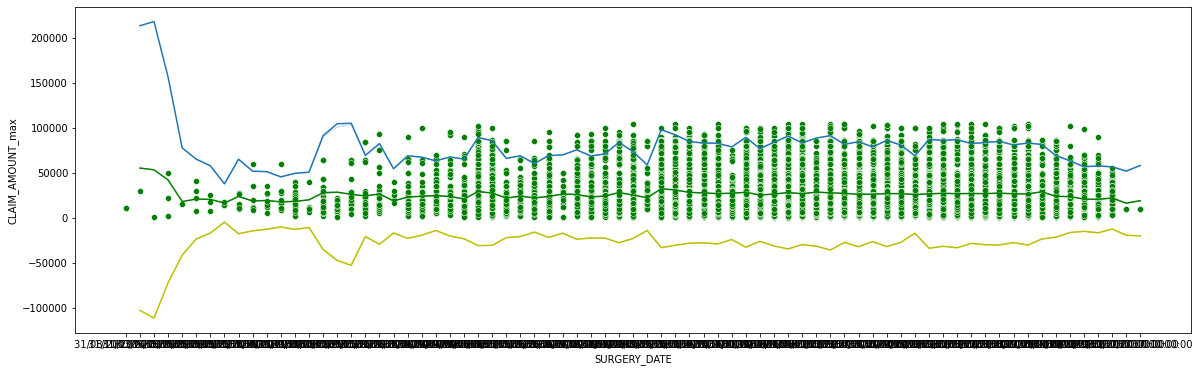

In [56]:
# Graficamos las series sin los valores que exceden el z-score
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=data_graph, 
             color='g',
             ci=False)

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

### Exportar Notebook 
Primero, obtenemos el nombre del archivo

In [ ]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

Exportamos todo el notebook. Código y resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --to html $nb_name 

Exportamos solo los resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --no-input --to html $nb_name 

Exportamos solo resultados, y sólo celdas que no tengan _tag=no_

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='{"no"}' --no-input --to html $nb_name 

### MAPA

In [58]:
import geopandas

In [61]:
dfg = geopandas.read_file('Census_2011/2011_Dist.shp')

In [62]:
type(dfg)

geopandas.geodataframe.GeoDataFrame

In [63]:
dfg.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


<AxesSubplot:>

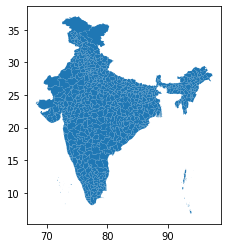

In [64]:
df['geometry'].plot()

In [66]:
df = pd.merge(dfg,
              df_merged,
              left_on = 'DISTRICT',
              right_on ='Official name',
              how = 'left'
             )

In [67]:
df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el program
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df = df.loc[df['Population']>0]

In [70]:
df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el program
19,Anantapur,Andhra Pradesh,28,22,553,"POLYGON ((78.14427 14.94530, 78.14382 14.94009...",AN,Anantapur,Anantapur,3.0,31.0,2241105.0,10205.0,219.61,18444.0
119,Chittoor,Andhra Pradesh,28,23,554,"POLYGON ((80.01818 13.49927, 80.01815 13.49928...",CH,Chittoor,Chittoor,4.0,31.0,1872951.0,6855.0,273.22,49172.0
168,East Godavari,Andhra Pradesh,28,14,545,"POLYGON ((82.01023 17.96357, 82.01368 17.95620...",EG,East Godavari,Rajahmundry,2.0,20.0,1832332.0,2561.0,715.48,58065.0
210,Guntur,Andhra Pradesh,28,17,548,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
322,Krishna,Andhra Pradesh,28,16,547,"MULTIPOLYGON (((80.60374 17.12738, 80.61251 17...",KR,Krishna,Machilipatnam,3.0,25.0,1735079.0,3775.0,459.62,45174.0
327,Kurnool,Andhra Pradesh,28,21,552,"POLYGON ((78.92098 16.11569, 78.93327 16.06979...",KU,Kurnool,Kurnool,3.0,26.0,2271686.0,7980.0,284.67,33024.0
408,Sri Potti Sriramulu Nellore,Andhra Pradesh,28,19,550,"POLYGON ((80.04883 15.01838, 80.05100 15.00723...",NE,Sri Potti Sriramulu Nellore,Nellore,4.0,38.0,2469712.0,10441.0,236.54,NaN
445,Prakasam,Andhra Pradesh,28,18,549,"POLYGON ((80.43917 15.80629, 80.43345 15.80437...",PR,Prakasam,Ongole,3.0,38.0,2288026.0,14322.0,159.76,16756.0
549,Srikakulam,Andhra Pradesh,28,11,542,"POLYGON ((84.76858 19.08002, 84.76625 19.07514...",SR,Srikakulam,Srikakulam,3.0,30.0,2191471.0,4591.0,477.34,16137.0
605,Visakhapatnam,Andhra Pradesh,28,13,544,"POLYGON ((83.07406 18.40189, 83.08967 18.41428...",VS,Visakhapatnam,Visakhapatnam,2.0,11.0,1959544.0,1048.0,1869.79,NaN


(76.36042095019074, 85.16897052217516, 12.29517878738338, 19.49279635675621)

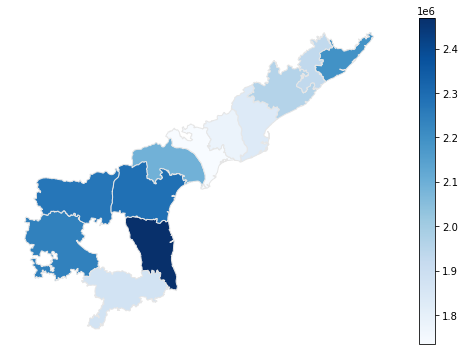

In [71]:
fig, ax = plt.subplots(1, figsize=(10,6))
df.plot(column='Population', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')